In [10]:
import model_analysis as fn
import model_functions as fn1

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from PIL import Image
from sklearn.preprocessing import normalize
import math
from scipy.stats import norm
import random

In [11]:
stimulus_duration = 1000
sigma_i = 0.25
sigma_s = 0.25
tau = 20 #ms
dt = tau/40 #ms
mu = 0.2
stimulus_duration = 1000
frames_duration = dt
alfa = 1

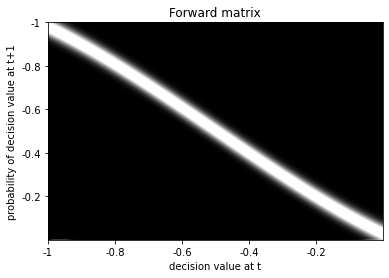

In [15]:
# The boundary for the forward matrix (since the atractors are approximately at 0.75 and -0.65)
L = 1
mu = -0.2
# Steps of 0.1 will be used
forward_matrix = fn.FM(L,mu,dt,tau,alfa,sigma_i,sigma_s)
# Plotting the forward matrix
plt.figure()
im = Image.fromarray(forward_matrix*25600)

plt.title ("Forward matrix")
plt.xlabel("decision value at t")
plt.ylabel("probability of decision value at t+1")
positions = [0,200,400,600,800,1000,1200,1400,1600,1800,2000]
labels = [-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1]
plt.xticks(positions, labels)
plt.yticks(positions,labels)
plt.imshow(im,aspect = "auto")

([<matplotlib.axis.XTick at 0x7fc4e8f36a90>,
 [Text(0.0, 0, '0.0'),
  Text(25.0, 0, '125.0'),
  Text(50.0, 0, '250.0'),
  Text(75.0, 0, '375.0'),
  Text(100.0, 0, '500.0'),
  Text(125.0, 0, '625.0'),
  Text(150.0, 0, '750.0'),
  Text(175.0, 0, '875.0'),
  Text(200.0, 0, '1000.0')])

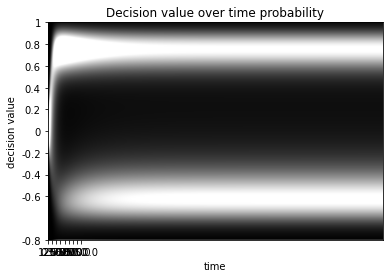

In [17]:
# The vector with the first decision value will be created:
vector = np.zeros((1,1000))[0]
vector[500] = 1

# In this list the different vectors will be stored
final = [vector]
# Each vector will be multiplied by the forward matrix
for i in range(int(stimulus_duration/frames_duration)):
    vector = forward_matrix.dot(vector)
    final.append(vector)
final = np.asarray(final)
final = final.transpose()
#DW(x_value, dt, tau, mu, sigma_i,  sigma_s, alfa, n_trials, stimulus_duration, frames_duration)
trials, stimulus_list =  fn1.DW_data(0, dt, tau, mu, sigma_i, sigma_s, alfa, 5, 100, 0.5)
im = Image.fromarray(final*100000)
fig, ax = plt.subplots(1,1)
img = ax.imshow(im,aspect = "auto")
for trial in trials:
    trial.pop()
    trial_new = []
    for i in trial:
        trial_new.append((i+L)*(500))
    plt.plot(np.arange(0,len(trial_new),1),trial_new)
positions = [0,100,200,300,400,500,600,700,800,1000]
labels = [1,0.8,0.6,0.4,0.2,0,-0.2,-0.4,-0.6,-0.8]
plt.yticks(positions, labels)
plt.title("Decision value over time probability")
plt.xlabel("time")
plt.ylabel("decision value")
positions = [200/8*n for n in range(9)]
labels = [1000/8*n for n in range(9)]
plt.xticks(positions, labels)

In [18]:
sigma_i = 0.25
sigma_s = 0
tau = 200 #ms
dt = tau/40 #ms
mu = 0.2
stimulus_duration = 1000
frames_duration = dt
alfa = 1

[-0.4, 0.6, 0.6, 0.7, 0.0, -0.5, -0.4, -0.6, 0.5, 0.7, 0.4, -0.1, 0.5, -0.2, -0.7, 0.5, 0.0, -0.2, -0.8]


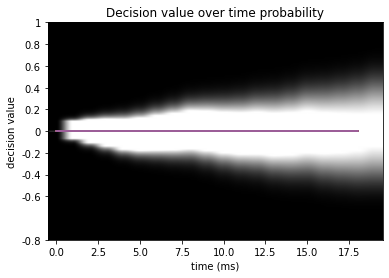

In [21]:
stimulus_mu = []
for i in range(19):
    stimulus_mu.append(random.randrange(-8, 8, 1)/10)
    #stimulus_mu.append(0.2)
print(stimulus_mu)

trial_list = []
for i in range(15):
    trial = []
    x = 0
    for mu in stimulus_mu:
        trials, stimulus = fn1.DW_data(0, dt, tau, mu, sigma_i, sigma_s, alfa, 50, 1, 0.5)
        for a in trials[0]:
            trial.append(a)
        #trial = trials[0]
        x = trials[0][len(trials[0])-1]
    trial_list.append(trial)

vector = np.zeros((1,1000))[0]
vector[500] = 1
final = [vector]
for mu in stimulus_mu:
    forward_matrix = fn.FM(L,mu,dt,tau,alfa,sigma_i,sigma_s)
    for i in range(len(trials[0])):
        vector = forward_matrix.dot(vector)
        final.append(vector)
final = np.asarray(final)
final = final.transpose()
im = Image.fromarray(final*100000)
fig, ax = plt.subplots(1,1)
img = ax.imshow(im,aspect = "auto")
for trial in trial_list:
    trial_new = []
    for i in trial:
        trial_new.append((i+L)*(500))
    plt.plot(np.arange(0,len(trial_new),1),trial_new)


positions =[0,100,200,300,400,500,600,700,800,1000]
labels = [1,0.8,0.6,0.4,0.2,0,-0.2,-0.4,-0.6,-0.8]
plt.yticks(positions, labels)
plt.title("Decision value over time probability")
plt.xlabel("time (ms)")
plt.ylabel("decision value")
positions = [200/8*n for n in range(9)]
labels = [1000/8*n for n in range(9)]
# plt.xticks(positions, labels)

In [22]:
stimulus_mu_list = []
for a in range(5):
    stimulus_mu = []
    for i in range(20):
        stimulus_mu.append(random.randrange(-4, 5, 1)/10)
    stimulus_mu_list.append(stimulus_mu)
print(stimulus_mu_list)
prob_simulation = []
prob_fm = []
for stimulus_mu in stimulus_mu_list:
    trial_list = []
    for i in range(10000):
        trial = []
        x = 0
        for mu in stimulus_mu:
            trials, stimulus = fn1.DW_data(0, dt, tau, mu, sigma_i, sigma_s, alfa, 5, 100, 0.5)
            for a in trials[0]:
                trial.append(a)
            x = trials[0][len(trials[0])-1]
        trial_list.append(trial)
    x_list = [(trial[len(trial[0])-1]+L)*1000 for trial in trial_list]
    x_list = np.sort(x_list)
    hist, base = np.histogram(x_list,bins = 200,range=(0,2000))
    prob_simulation.append(sum(hist[:int(len(hist)/2)])/10000)

    x = 0

    vector = np.zeros((1,2000))[0]
    vector[1000] = 1
    final = [vector]
    for mu in stimulus_mu:
        forward_matrix = fn.FM1(L,mu,dt,tau,alfa,sigma_i,sigma_s)
        for i in range(len(trials[0])):
            vector = forward_matrix.dot(vector)
            final.append(vector)
    final = np.asarray(final)
    final = final.transpose()
    x_list = [final[i][len(final[0])-1]*2000 for i in range(len(final))]
    prob_fm.append(sum(x_list[:int(len(x_list)/2)])/2000)


for i in range(len(prob_simulation)):
    plt.plot([prob_simulation[i]], [prob_fm[i]], marker='o', markersize=3, color="red")
plt.axis([0,1,0,1])
plt.xlabel("Probability of Right Choice Simulation")
plt.ylabel("Probability of Right Choice Forward Matrix")
xpoints = ypoints = np.arange(0,1.1,0.1)
plt.plot(xpoints,ypoints,"--")

[[-0.3, 0.0, 0.2, -0.1, 0.3, 0.1, -0.2, -0.3, 0.3, -0.4, 0.4, 0.1, 0.2, 0.0, -0.3, 0.2, 0.2, 0.2, 0.2, 0.4], [0.0, 0.0, 0.0, 0.4, 0.4, -0.4, 0.3, 0.1, -0.3, -0.1, -0.4, -0.2, 0.2, -0.2, -0.1, 0.4, -0.4, -0.2, 0.1, -0.3], [-0.1, 0.1, -0.3, -0.2, 0.2, 0.1, -0.3, -0.2, 0.4, -0.4, 0.2, -0.1, 0.3, -0.3, -0.4, -0.1, -0.1, -0.4, 0.0, -0.4], [0.1, -0.1, 0.0, 0.0, -0.3, 0.2, 0.2, -0.2, -0.1, 0.3, -0.4, -0.4, -0.1, -0.4, -0.2, -0.3, 0.0, 0.4, -0.4, 0.1], [0.2, 0.1, -0.2, -0.4, -0.3, 0.3, 0.1, 0.0, 0.0, 0.3, 0.2, -0.2, -0.2, 0.1, 0.1, -0.4, 0.4, 0.2, -0.4, -0.2]]


TypeError: object of type 'int' has no len()

[[-0.1, 0.3, 0.1, 0.2, -0.3, 0.4, 0.0, 0.2, 0.0, -0.3, 0.2, -0.4, 0.0, -0.3, 0.4, -0.2, 0.1, -0.4, 0.4, 0.2], [-0.1, 0.3, 0.3, 0.4, 0.2, 0.0, -0.4, -0.1, -0.1, -0.2, -0.1, -0.2, 0.1, 0.2, -0.4, -0.4, 0.0, 0.4, 0.1, 0.3]]


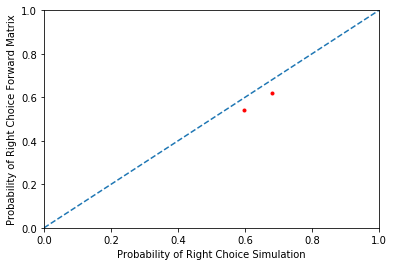

In [8]:
stimulus_mu_list = []
for a in range(2):
    stimulus_mu = []
    for i in range(20):
        stimulus_mu.append(random.randrange(-4, 5, 1)/10)
    stimulus_mu_list.append(stimulus_mu)
print(stimulus_mu_list)
prob_simulation = []
prob_fm = []
for stimulus_mu in stimulus_mu_list:
    trial_list = []
    for i in range(10000):
        trial = []
        x = 0
        for mu in stimulus_mu:
            trials, stimulus = fn.DW(x, dt, tau, mu, sigma_i, sigma_s, alfa, 1, 50, frames_duration)
            for a in trials[0]:
                trial.append(a)
            x = trials[0][len(trials[0])-1]
        trial_list.append(trial)
    x_list = [(trial[len(trial)-1]+L)*1000 for trial in trial_list]
    x_list = np.sort(x_list)
    hist, base = np.histogram(x_list,bins = 200,range=(0,2000))
    prob_simulation.append(sum(hist[int(len(hist)/2):])/10000)

    x = 0

    vector = np.zeros((1,2000))[0]
    vector[1000] = 1
    final = [vector]
    for mu in stimulus_mu:
        forward_matrix = fn.FM1(L,mu,dt,tau,alfa,sigma_i,sigma_s)
        for i in range(len(trials[0])):
            vector = forward_matrix.dot(vector)
            final.append(vector)
    final = np.asarray(final)
    final = final.transpose()
    x_list = [final[i][len(final[0])-1]*2000 for i in range(len(final))]
    prob_fm.append(sum(x_list[int(len(x_list)/2):])/2000)


for i in range(len(prob_simulation)):
    plt.plot([prob_simulation[i]], [prob_fm[i]], marker='o', markersize=3, color="red")
plt.axis([0,1,0,1])
plt.xlabel("Probability of Right Choice Simulation")
plt.ylabel("Probability of Right Choice Forward Matrix")
xpoints = ypoints = np.arange(0,1.1,0.1)
plt.plot(xpoints,ypoints,"--")

[[0.1, -0.4, -0.1, 0.0, -0.1, 0.4, 0.0, -0.3, 0.4, 0.3, -0.1, 0.2, -0.1, -0.2, 0.0, -0.4, 0.0, 0.1, -0.3, -0.1]]
[0.3965]
[0.34227774807353334]


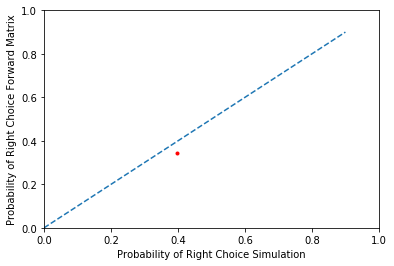

In [9]:
stimulus_mu_list = []
for a in range(1):
    stimulus_mu = []
    for i in range(20):
        stimulus_mu.append(random.randrange(-4, 5, 1)/10)
    stimulus_mu_list.append(stimulus_mu)
print(stimulus_mu_list)
prob_simulation = []
prob_fm = []
for stimulus_mu in stimulus_mu_list:
    probability_simulation_list = []
    for i in range(10000):
        probability_simulation = []
        x = 0
        for mu in stimulus_mu:
            trials, stimulus = fn.DW(x, dt, tau, mu, sigma_i, sigma_s, alfa, 1, 50, frames_duration)
            x = trials[0][len(trials[0])-1]
        if x >= 0:
            probability_simulation.append(1)
        else:
            probability_simulation.append(0)
        probability_simulation_list.append(sum(probability_simulation)/len(probability_simulation))
    prob_simulation.append(sum(probability_simulation_list)/len(probability_simulation_list))
    
    x = 0
    vector = np.zeros((1,2000))[0]
    vector[1000] = 1
    final = [vector]
    for mu in stimulus_mu:
        forward_matrix = fn.FM1(L,mu,dt,tau,alfa,sigma_i,sigma_s)
        for i in range(len(trials[0])):
            vector = forward_matrix.dot(vector)
            final.append(vector)
    final = np.asarray(final)
    final = final.transpose()
    x_list = [final[i][len(final[0])-1] for i in range(len(final))]
    length = len(x_list)
    middle_index = length//2
    right = x_list[middle_index:]
    probability_fm = sum(right)
    prob_fm.append(probability_fm)
print(prob_simulation)
print(prob_fm)
for i in range(len(prob_simulation)):
    plt.plot([prob_simulation[i]], [prob_fm[i]], marker='o', markersize=3, color="red")
plt.axis([0,1,0,1])
plt.xlabel("Probability of Right Choice Simulation")
plt.ylabel("Probability of Right Choice Forward Matrix")
xpoints = ypoints = np.arange(0,1,0.1)
plt.plot(xpoints,ypoints,"--")